In [79]:
%matplotlib inline

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve

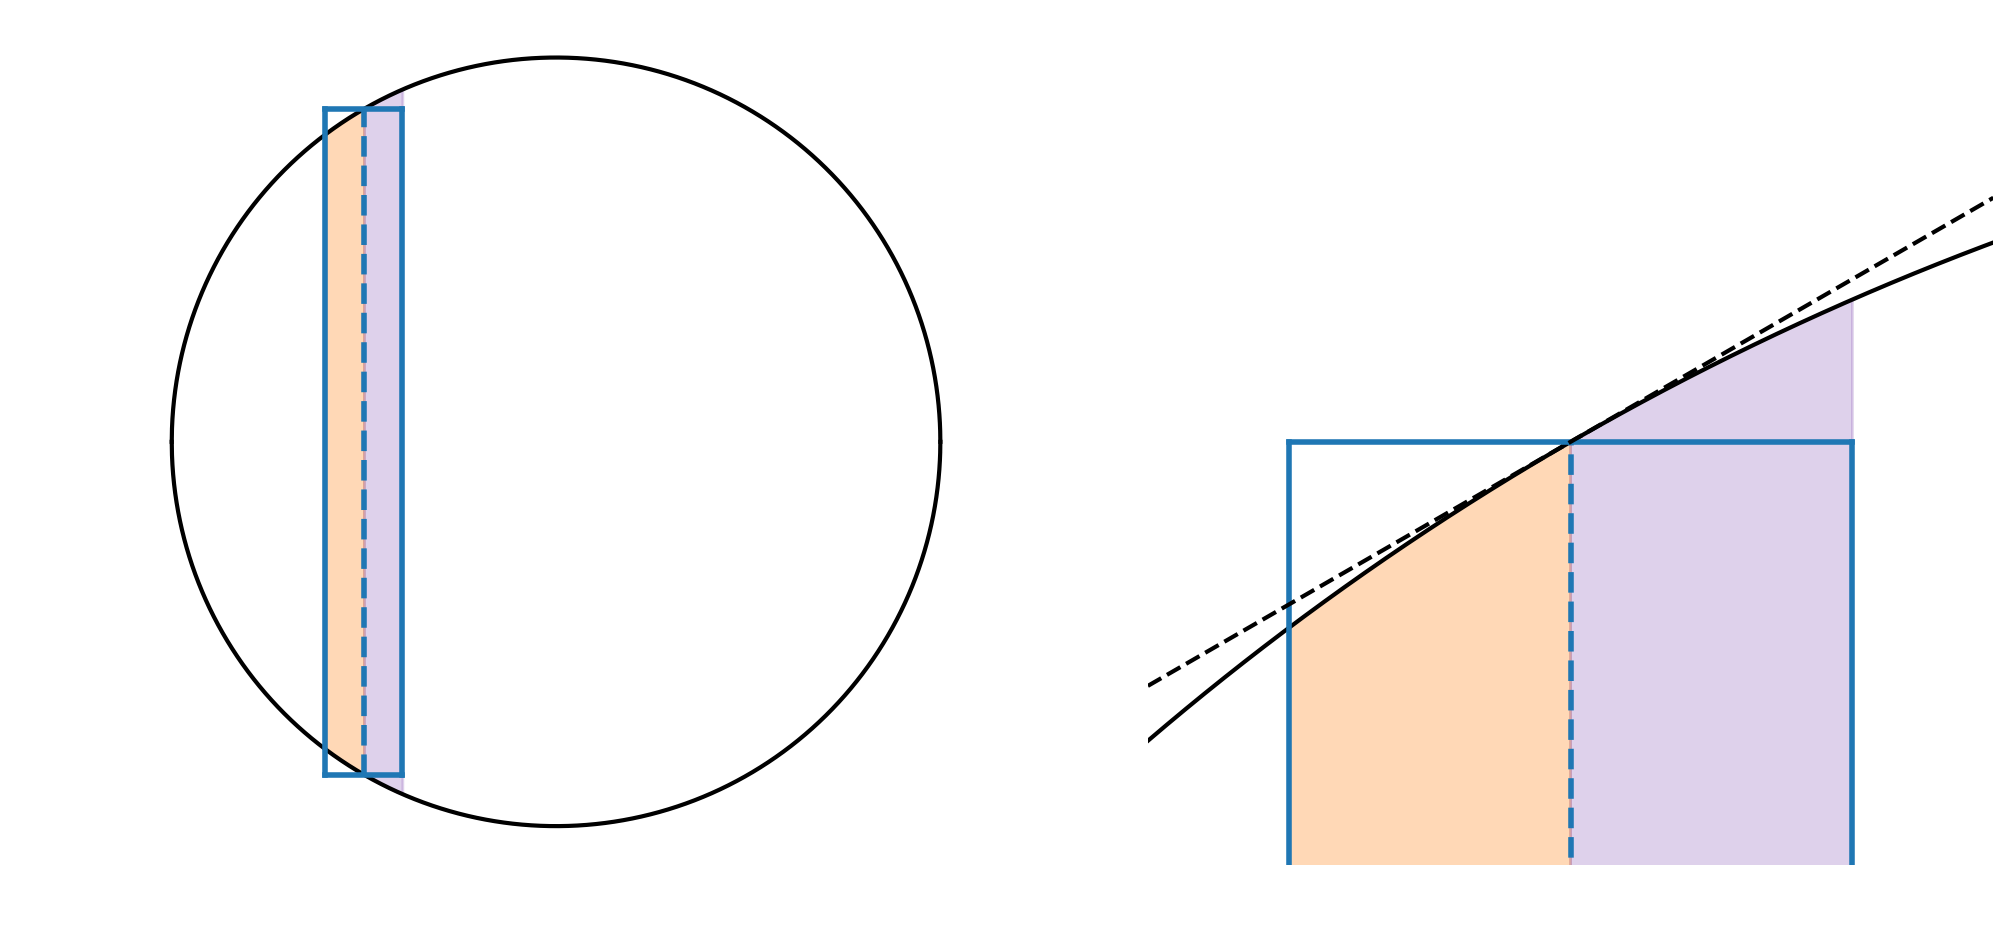

In [81]:
def plot(ax, x0=-0.5, eps=0.1, res=10000):
    x = np.linspace(-1, 1, res)
    y = np.sqrt(1 - x ** 2)
    y0 = np.sqrt(1 - x0 ** 2)
    xL = np.linspace(x0 - eps, x0, res)
    yL = np.sqrt(1 - xL ** 2)
    xR = np.linspace(x0, x0 + eps, res)
    yR = np.sqrt(1 - xR ** 2)
    ax.plot(x, y, 'k-')
    ax.plot(x, -y, 'k-')
    ax.plot([x0, x0], [-y0, y0], 'C0--', lw=2)
    ax.plot([x0 - eps, x0 - eps], [-y0, y0], 'C0-', lw=2)
    ax.plot([x0 + eps, x0 + eps], [-y0, y0], 'C0-', lw=2)
    ax.plot([x0 - eps, x0 + eps], [y0, y0], 'C0-', lw=2)
    ax.plot([x0 - eps, x0 + eps], [-y0, -y0], 'C0-', lw=2)
    ax.fill_between(xL, -yL, yL, color="C1", alpha=0.3)
    ax.fill_between(xR, -yR, yR, color="C4", alpha=0.3)

    
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
plot(ax[0])
ax[0].set_aspect(1)
ax[0].axis('off')

plot(ax[1])

x0 = -0.5
y0 = np.sqrt(1 - x0 ** 2)
eps = 0.1
xL = x0 - eps
xR = x0 + eps
yL = np.sqrt(1 - xL ** 2)
yR = np.sqrt(1 - xR ** 2)



x = np.linspace(x0 - 0.15, x0 + 0.15, 1000)
ax[1].plot(x, y0 - x0 / y0 * (x - x0), 'k--')


ax[1].set_xlim(x0 - 0.15, x0 + 0.15)
ax[1].set_ylim(y0 - 0.15, y0 + 0.15)
ax[1].set_aspect(1)
ax[1].axis('off');

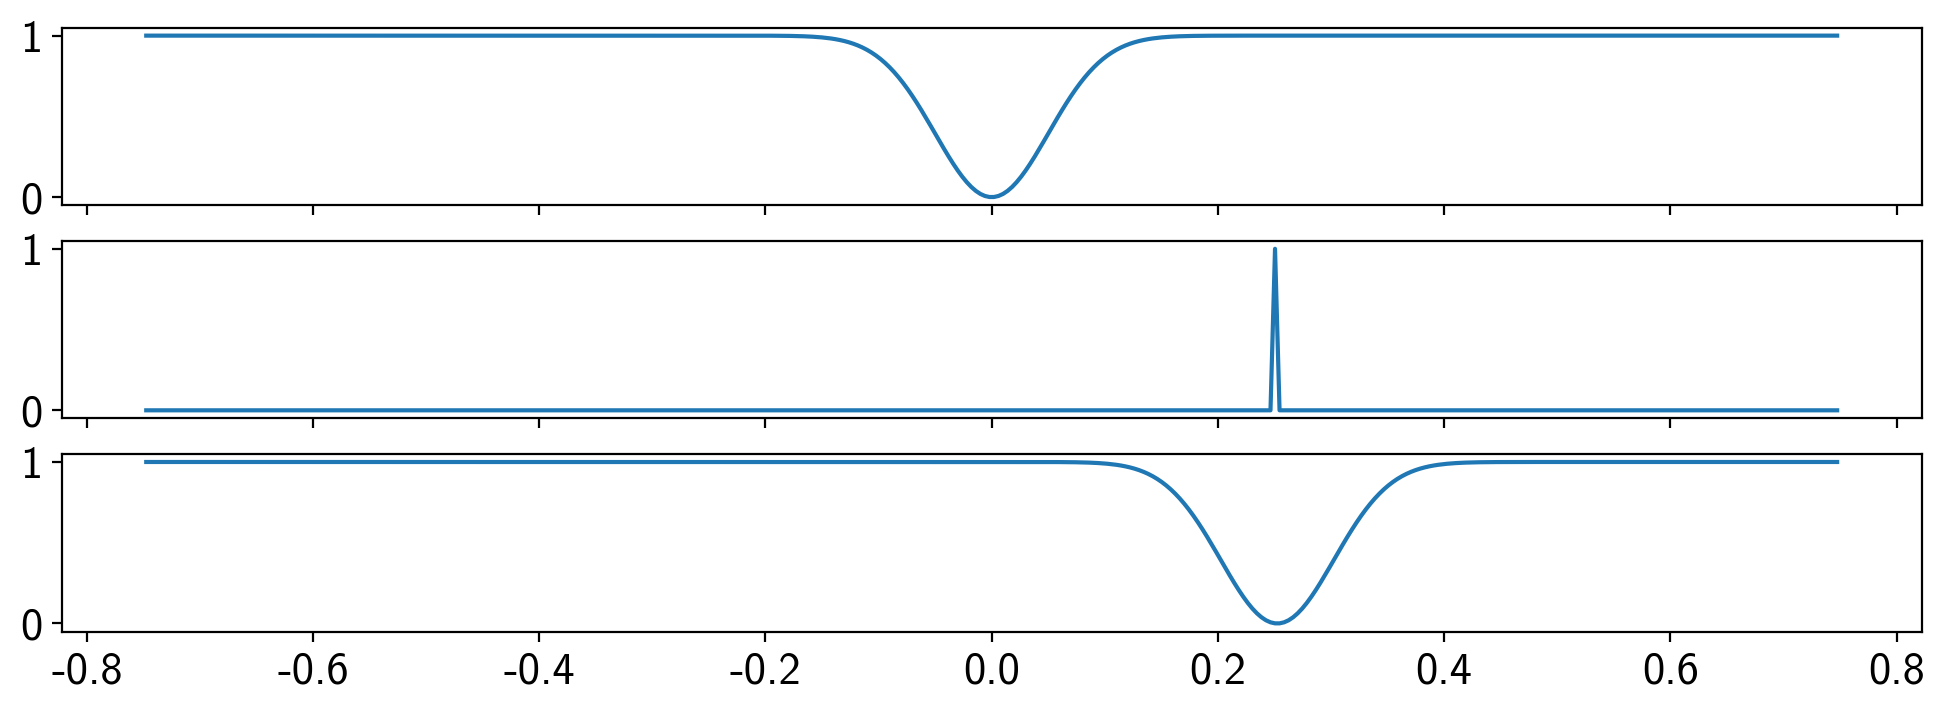

In [94]:
# Define a base spectrum
xi = np.linspace(-1, 1, 500)
obs = np.abs(xi) < 0.75
amp = 1.0
mu = 0.0
sigma = 0.05
shift = 0.25

I0 = 1 - amp * np.exp(-0.5 * (xi - mu) ** 2 / sigma ** 2)
delta = np.zeros_like(xi)
delta[np.argmin(np.abs(xi - shift))] = 1
I = convolve(I0, delta, mode="same")

fig, ax = plt.subplots(3, 1, sharex=True, sharey=True)
ax[0].plot(xi[obs], I0[obs])
ax[1].plot(xi[obs], delta[obs])
ax[2].plot(xi[obs], I[obs])